In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


In [3]:
df_h = pd.read_csv("healthcare.csv")

In [4]:
df_h

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [5]:
df_h.shape

(106987, 15)

In [6]:
df_h.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [8]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [10]:
df_h.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,106987.0,1.472814e+14,2.558267e+14,3.921784e+04,4.173523e+12,3.172463e+13,9.433600e+13,9.999816e+14
AppointmentID,106987.0,5.675434e+06,7.133274e+04,5.030230e+06,5.640490e+06,5.680744e+06,5.725634e+06,5.790484e+06
Age,106987.0,3.831609e+01,2.246621e+01,1.000000e+00,1.900000e+01,3.800000e+01,5.600000e+01,1.150000e+02
Date.diff,106987.0,1.016672e+01,1.526351e+01,-6.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,1.790000e+02


In [12]:
df_h.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [13]:
df_h.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [14]:
df_h['AppointmentDay'] = pd.to_datetime(df_h['AppointmentDay'])
df_h['ScheduledDay'] = pd.to_datetime(df_h['ScheduledDay'])

In [15]:
df_h.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [16]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  float64       
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  bool          
 8   Hipertension    106987 non-null  bool          
 9   Diabetes        106987 non-null  bool          
 10  Alcoholism      106987 non-null  bool          
 11  Handcap         106987 non-null  bool          
 12  SMS_received    106987 non-null  bool          
 13  Showed_up       106987 non-null  bool          
 14  Date.diff       106987 non-null  int

In [18]:
print(df_h.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


In [22]:
df_h['Gender']=df_h['Gender'].map({'M':0,'F':1})
df_h

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,NaN,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,NaN,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,NaN,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,NaN,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,NaN,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,NaN,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,NaN,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,NaN,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,NaN,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [25]:
df_h.rename(columns={'Hipertension': 'Hypertension','Handcap': 'Handicap'},inplace=True)
df_h

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,NaN,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,NaN,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,NaN,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,NaN,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,NaN,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,NaN,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,NaN,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,NaN,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,NaN,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [27]:
df_h.drop(columns=['PatientId','AppointmentDay','Neighbourhood'],inplace=True)
df_h

,AppointmentID,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff
0,5642903,NaN,2016-04-29,62,False,True,False,False,False,False,True,0
1,5642503,NaN,2016-04-29,56,False,False,False,False,False,False,True,0
2,5642549,NaN,2016-04-29,62,False,False,False,False,False,False,True,0
3,5642828,NaN,2016-04-29,8,False,False,False,False,False,False,True,0
4,5642494,NaN,2016-04-29,56,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106982,5651768,NaN,2016-05-03,56,False,False,False,False,False,True,True,35
106983,5650093,NaN,2016-05-03,51,False,False,False,False,False,True,True,35
106984,5630692,NaN,2016-04-27,21,False,False,False,False,False,True,True,41
106985,5630323,NaN,2016-04-27,38,False,False,False,False,False,True,True,41


In [28]:
missing_values=df_h.isnull().sum() #missing values
percent_missing=df_h.isnull().sum()/df_h.shape[0]*100 #missing_values %
value={
    'missing_values':missing_values,
    'percent_missing %':percent_missing}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
AppointmentID,0,0.0
Gender,106987,100.0
ScheduledDay,0,0.0
Age,0,0.0
Scholarship,0,0.0
Hypertension,0,0.0
Diabetes,0,0.0
Alcoholism,0,0.0
Handicap,0,0.0
SMS_received,0,0.0


C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\3297766521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df_h, palette="PuRd")
C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\3297766521.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.countplot(x='Gender', data=df_h, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

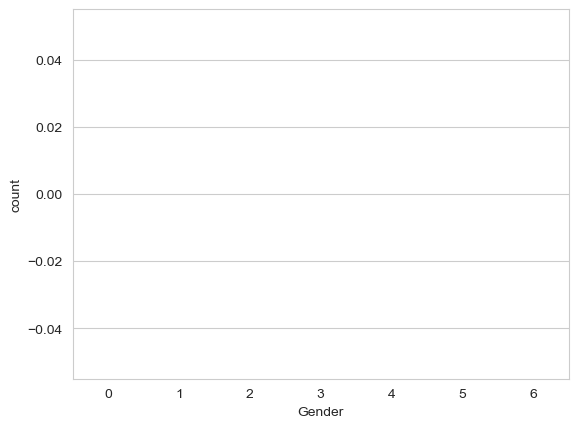

In [33]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Gender', data=df_h, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\237232717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Hypertension', data=df_h, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

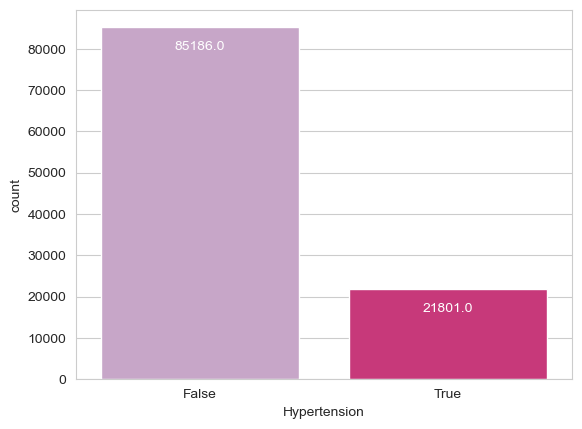

In [34]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Hypertension', data=df_h, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\2442598245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diabetes', data=df_h, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

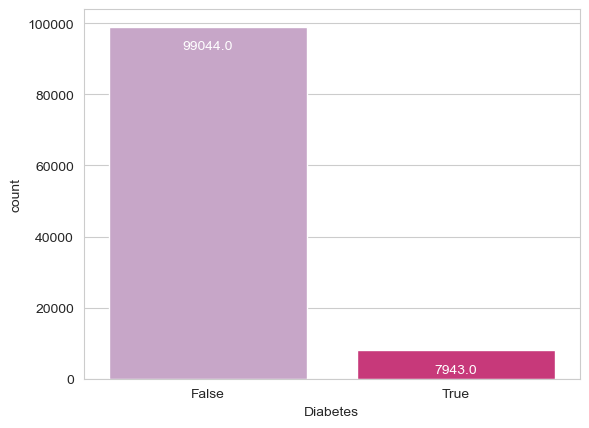

In [35]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Diabetes', data=df_h, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\4003389887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Handicap', data=df_h, palette="PuRd")


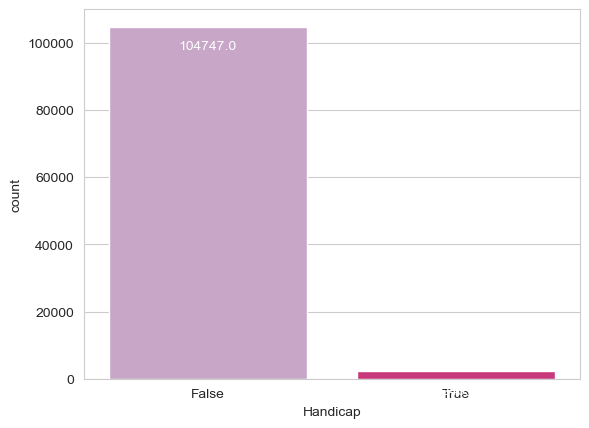

In [36]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Handicap', data=df_h, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show()

C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\3488511690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Alcoholism', data=df_h, palette="BuGn")


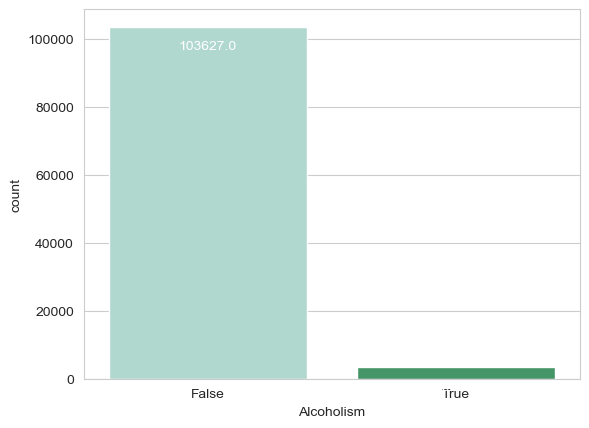

In [38]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Alcoholism', data=df_h, palette="BuGn")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

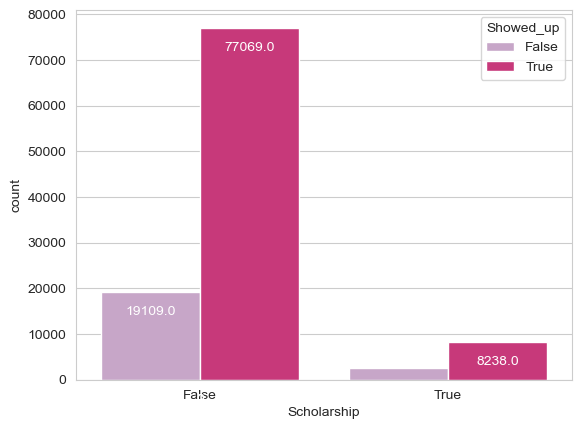

In [39]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Scholarship',hue='Showed_up',data=df_h, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\1476472751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Scholarship', data=df_h, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

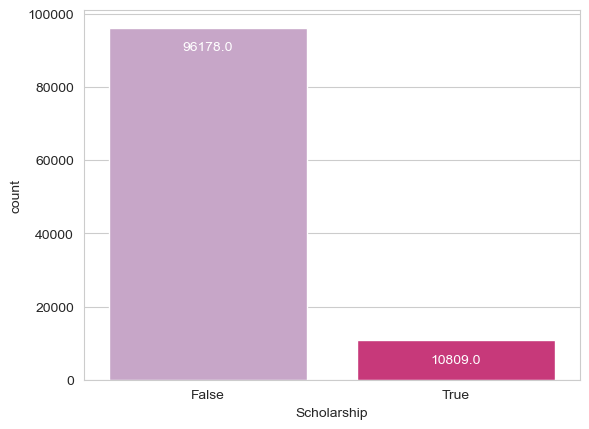

In [40]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Scholarship', data=df_h, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\sunan\AppData\Local\Temp\ipykernel_23324\3581646850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SMS_received', data=df_h, palette="RdBu")


<function matplotlib.pyplot.show(close=None, block=None)>

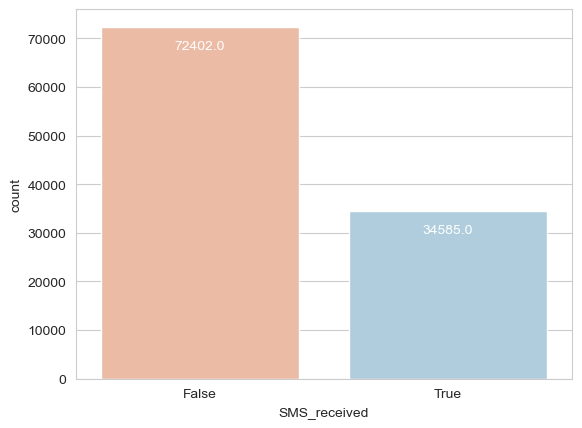

In [41]:
sns.set_style("whitegrid")

ax = sns.countplot(x='SMS_received', data=df_h, palette="RdBu")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='top', color='white', size=10)
plt.show

Text(0.5, 1.0, 'Patient Show-Up Status')

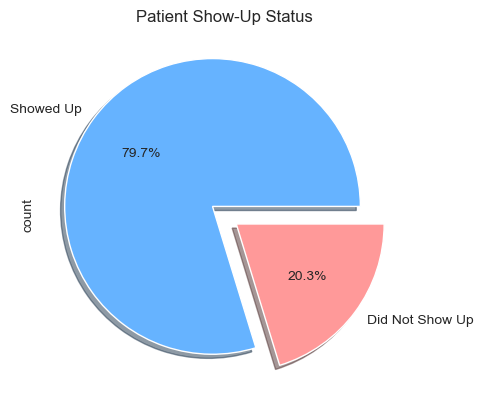

In [42]:
df_h["Showed_up"].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Move both segments outward slightly
    autopct='%1.1f%%',              # Display percentage with 1 decimal place
    shadow=True,                    # Add a shadow for a 3D effect
    colors=["#66b3ff", "#ff9999"],  # Custom colors for visual appeal
    labels=['Showed Up', 'Did Not Show Up']  # Descriptive labels for the pie chart
)

plt.title('Patient Show-Up Status')

array([[<Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'ScheduledDay'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Date.diff'}>, <Axes: >]], dtype=object)

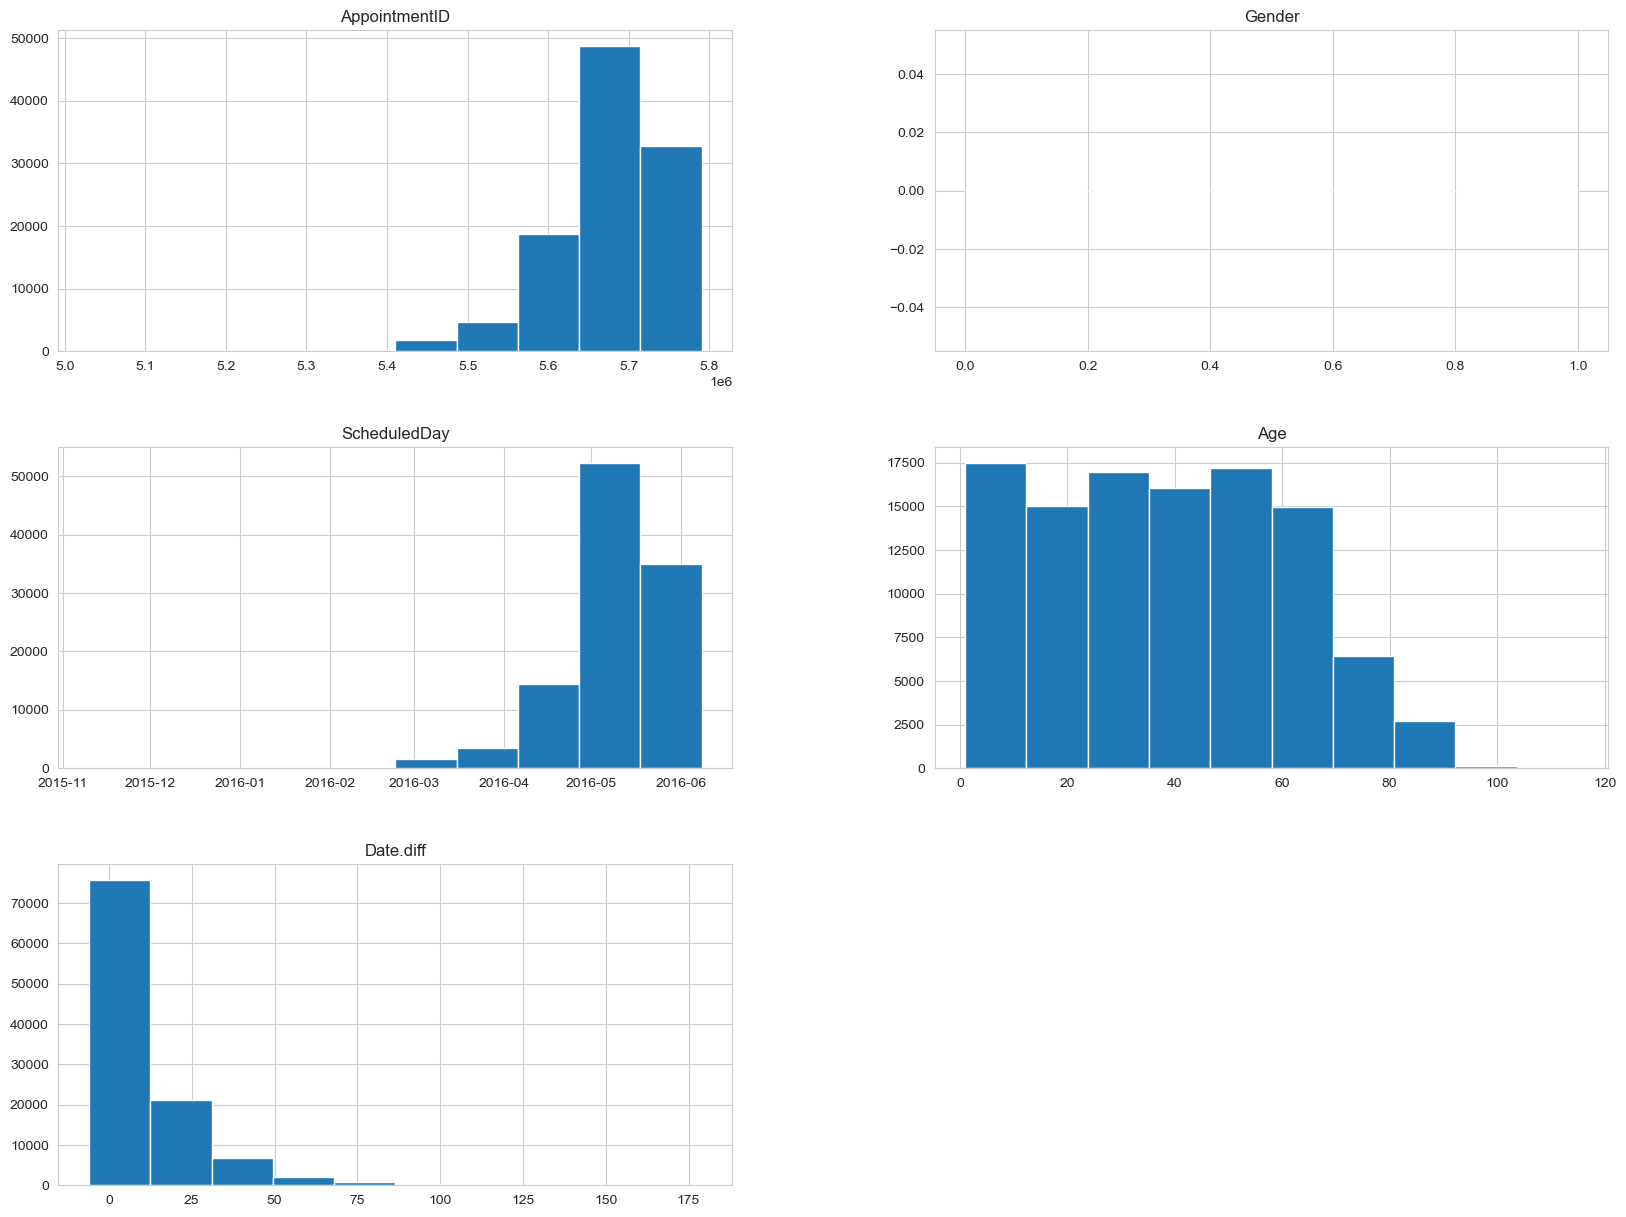

In [43]:
df_h.hist(figsize=(20,15))

SMS_received
False    72402
True     34585
Name: count, dtype: int64


<Axes: xlabel='SMS_received', ylabel='count'>

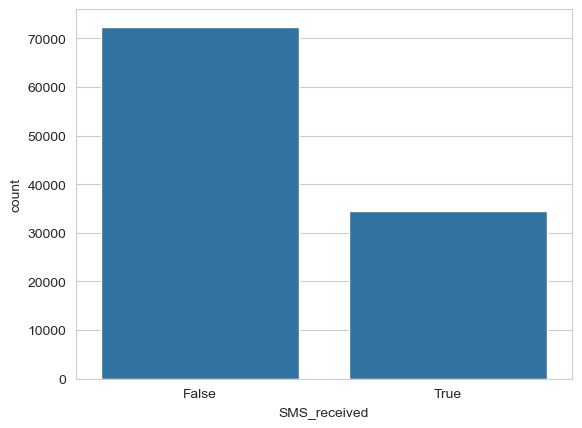

In [44]:
print(df_h['SMS_received'].value_counts())
sns.countplot(x='SMS_received',data=df_h)

In [46]:
df_h['ScheduledDay_DayofWeek']=df_h['ScheduledDay'].dt.dayofweek
df_h

,AppointmentID,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek
0,5642903,NaN,2016-04-29,62,False,True,False,False,False,False,True,0,4
1,5642503,NaN,2016-04-29,56,False,False,False,False,False,False,True,0,4
2,5642549,NaN,2016-04-29,62,False,False,False,False,False,False,True,0,4
3,5642828,NaN,2016-04-29,8,False,False,False,False,False,False,True,0,4
4,5642494,NaN,2016-04-29,56,False,True,True,False,False,False,True,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,5651768,NaN,2016-05-03,56,False,False,False,False,False,True,True,35,1
106983,5650093,NaN,2016-05-03,51,False,False,False,False,False,True,True,35,1
106984,5630692,NaN,2016-04-27,21,False,False,False,False,False,True,True,41,2
106985,5630323,NaN,2016-04-27,38,False,False,False,False,False,True,True,41,2


In [47]:
df_h.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Showed_up', 'Date.diff', 'ScheduledDay_DayofWeek'],
      dtype='object')

In [48]:
e=LabelEncoder()

df_h['Scholarship']=e.fit_transform(df_h['Scholarship'])
df_h['Hypertension']=e.fit_transform(df_h['Hypertension'])
df_h['Diabetes']=e.fit_transform(df_h['Diabetes'])
df_h['Alcoholism']=e.fit_transform(df_h['Alcoholism'])
df_h['Handicap']=e.fit_transform(df_h['Handicap'])
df_h['SMS_received']=e.fit_transform(df_h['SMS_received'])
df_h['Showed_up']=e.fit_transform(df_h['Showed_up'])
df_h['Date.diff']=e.fit_transform(df_h['Date.diff'])


In [49]:
df_h.head()

,AppointmentID,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek
0,5642903,NaN,2016-04-29,62,0,1,0,0,0,0,1,2,4
1,5642503,NaN,2016-04-29,56,0,0,0,0,0,0,1,2,4
2,5642549,NaN,2016-04-29,62,0,0,0,0,0,0,1,2,4
3,5642828,NaN,2016-04-29,8,0,0,0,0,0,0,1,2,4
4,5642494,NaN,2016-04-29,56,0,1,1,0,0,0,1,2,4


In [50]:
df_h

,AppointmentID,Gender,ScheduledDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek
0,5642903,NaN,2016-04-29,62,0,1,0,0,0,0,1,2,4
1,5642503,NaN,2016-04-29,56,0,0,0,0,0,0,1,2,4
2,5642549,NaN,2016-04-29,62,0,0,0,0,0,0,1,2,4
3,5642828,NaN,2016-04-29,8,0,0,0,0,0,0,1,2,4
4,5642494,NaN,2016-04-29,56,0,1,1,0,0,0,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,5651768,NaN,2016-05-03,56,0,0,0,0,0,1,1,37,1
106983,5650093,NaN,2016-05-03,51,0,0,0,0,0,1,1,37,1
106984,5630692,NaN,2016-04-27,21,0,0,0,0,0,1,1,43,2
106985,5630323,NaN,2016-04-27,38,0,0,0,0,0,1,1,43,2


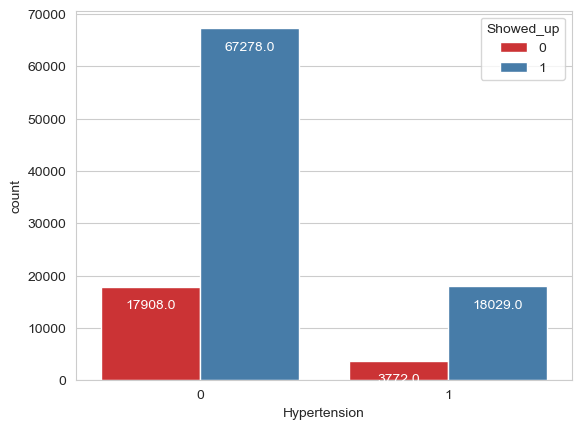

In [51]:
ax = sns.countplot(x='Hypertension',hue='Showed_up',data=df_h, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

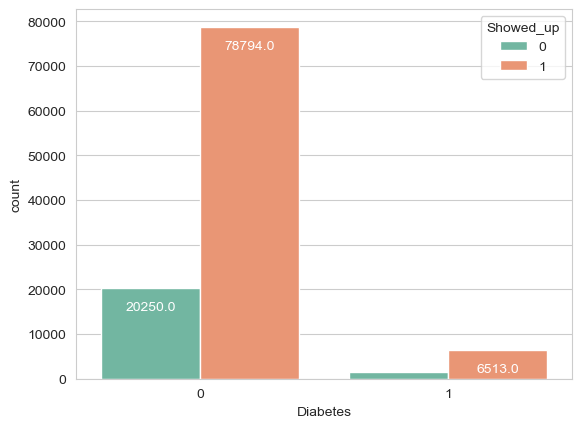

In [52]:
ax = sns.countplot(x='Diabetes',hue='Showed_up',data=df_h, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

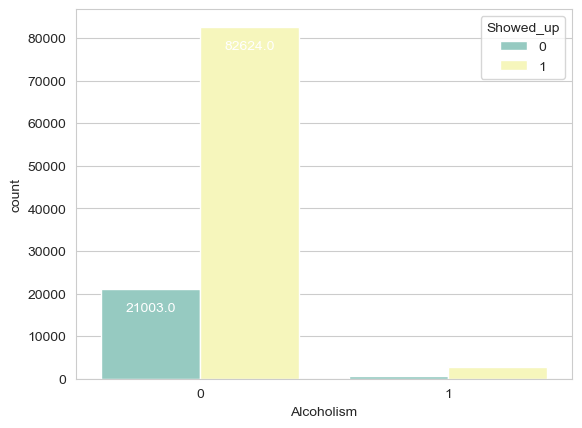

In [53]:
ax = sns.countplot(x='Alcoholism',hue='Showed_up',data=df_h, palette="Set3")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

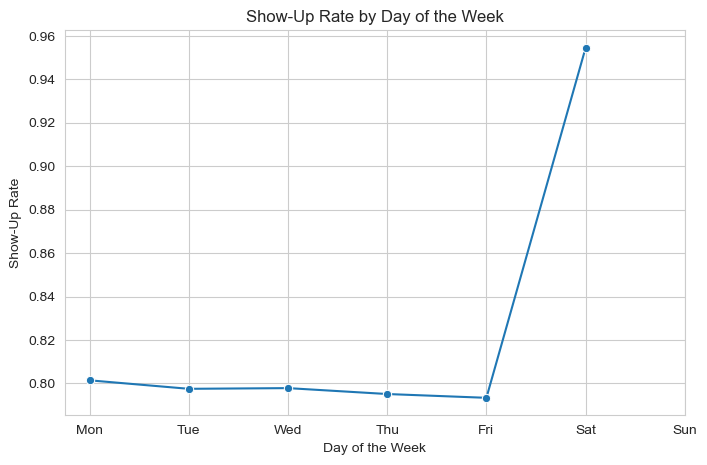

In [54]:
show_rate_by_day = df_h.groupby('ScheduledDay_DayofWeek')['Showed_up'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=show_rate_by_day.index, y=show_rate_by_day.values, marker='o')
plt.title("Show-Up Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Show-Up Rate")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [56]:
df_h.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Showed_up', 'Date.diff', 'ScheduledDay_DayofWeek'],
      dtype='object')

In [64]:
x=df_h.drop(['AppointmentID','Showed_up','ScheduledDay','Date.diff','ScheduledDay_DayofWeek','Gender'],axis=1)
y=df_h['Showed_up']
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20, random_state = 101)

In [65]:
x

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...
106982,56,0,0,0,0,0,1
106983,51,0,0,0,0,0,1
106984,21,0,0,0,0,0,1
106985,38,0,0,0,0,0,1


In [66]:
x.columns

Index(['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMS_received'],
      dtype='object')

In [67]:
accuracies = {}
algo_time={}
roc_auc_scores={}

In [68]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))

    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

LOGISTIC REGRESSION
ROC_AUC value : 50.0 % 


Accuracy Score : 79.69482059610465 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


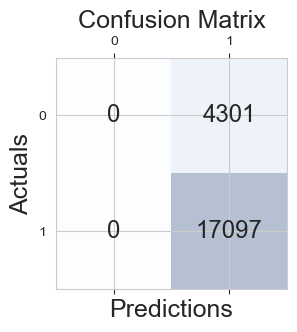

In [69]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

In [70]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [71]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 45}
The best score we have achieved is: 0.7961887698351291


K-NEAREST NEIGHBOURS
ROC_AUC value : 50.034148057671736 % 


Accuracy Score : 79.64107537183517 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.25      0.00      0.01      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.52      0.50      0.45     21398
weighted avg       0.69      0.80      0.71     21398



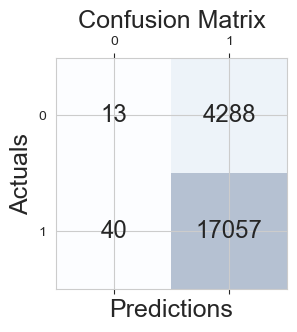

In [72]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc

In [73]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

In [74]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
The best score we have achieved is: 79.69482063962269


RANDOM FOREST TREE
ROC_AUC value : 50.0 % 


Accuracy Score : 79.69482059610465 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


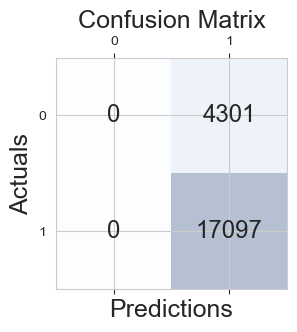

In [75]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')
#acc = CV_rfc.score(x_train, y_train)*100
#accuracies['RANDOM FOREST TREE'] = acc

In [84]:
# Gender	Age	Scholarship	Hypertension	Diabetes	Alcoholism	Handicap	SMS_received
print("NOT SHOWED UP BASED ON ML ALGORITHMS")
print("Enter 1 for yes and 0for no")
Gender =int(input("Is the pateint male?"))
Age=int(input("Is the patient senior citizen ?"))
Scholarship=int(input("Does the patient have hyper tension"))
Hypertension=int(input("Does the patient have diabetes ?"))
Diabetes=int(input("Does the patient have Diabetes"))
Alcoholism = int(input("Does the patient drink alcohol ? "))
Handicapped = int(input("Is the patient handicapped? "))
SMS_received = int(input("Did the patient receive SMS ? "))
patient = [[Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received]]
result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print('The Patient has not showed up for the appointment.')
    print()
else :
    print('The Patient has showed up for the appointment.')
    print()

NOT SHOWED UP BASED ON ML ALGORITHMS
Enter 1 for yes and 0for no


c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but KNeighborsClassifier is expecting 7 features as input.

In [81]:
import joblib
#Save as a pickle file
filename='final_model.pkl'
joblib.dump(knn,open(filename,'wb'))
# wb - write binary

In [82]:
pip install -requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'equirements.txt'


In [83]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
